# Stage 2: Pre-processing to remove noise from Tweets

In [ ]:
pwd

In [1]:
import pandas as pd
import re
from termcolor import colored
from datetime import datetime,date
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_Tweets=pd.read_csv('tweets.csv')

In [42]:
rawTwit=raw_Tweets.copy()

In [54]:
rawTwit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82126 entries, 0 to 82125
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   _id                       82126 non-null  object
 1   created_at                82126 non-null  object
 2   id                        82126 non-null  int64 
 3   text                      82126 non-null  object
 4   source                    82126 non-null  object
 5   truncated                 82126 non-null  bool  
 6   user.screen_name          82126 non-null  object
 7   user.location             49283 non-null  object
 8   user.description          64254 non-null  object
 9   extended_tweet.full_text  12664 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 5.7+ MB


In [55]:
rawTwit.isnull().any()

_id                         False
created_at                  False
id                          False
text                        False
source                      False
truncated                   False
user.screen_name            False
user.location                True
user.description             True
extended_tweet.full_text     True
dtype: bool

In [44]:
rawTwit.tail(5)

,_id,created_at,id,text,source,truncated,user.screen_name,user.location,user.description,extended_tweet.full_text
82121,62c765cf1ca034c21686f594,Thu Jul 07 23:01:30 +0000 2022,1545181239849648135,"RT @GlasnostGone: If you tolerate this, then y...","<a href=""http://twitter.com/download/iphone"" r...",False,sinalouf,NaN,@BackAndAlive @UkraineAidOps @MriyaAid,NaN
82122,62c765d31ca034c21686f595,Thu Jul 07 23:01:34 +0000 2022,1545181258694664192,RT @GlasnostGone: Goodnight #Ukraine. I shed s...,"<a href=""http://twitter.com/download/android"" ...",False,chr_i_s_t_ine,Toronto,Ukrainian Canadian speaking Canadian Ukrainian...,NaN
82123,62c765d71ca034c21686f596,Thu Jul 07 23:01:38 +0000 2022,1545181272762359808,"RT @kennardmatt: As Zelensky hails the ""specia...","<a href=""http://twitter.com/download/iphone"" r...",False,BeckyCheAbas,"Brighton, England",Psychologist and Socialist. Dismayed by the re...,NaN
82124,62c765d71ca034c21686f597,Thu Jul 07 23:01:38 +0000 2022,1545181274863722498,RT @clarissaward: We met mothers who walked fo...,"<a href=""http://twitter.com/download/android"" ...",False,GhostDisco91,NaN,"She/her. I like weird TV, drinking champagne, ...",NaN
82125,62c765d81ca034c21686f598,Thu Jul 07 23:01:38 +0000 2022,1545181275056750594,RT @pvtjokerus: Those 71 million people are in...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,ghost_hecate,The Lone Prairie,We'll make great pets.,NaN


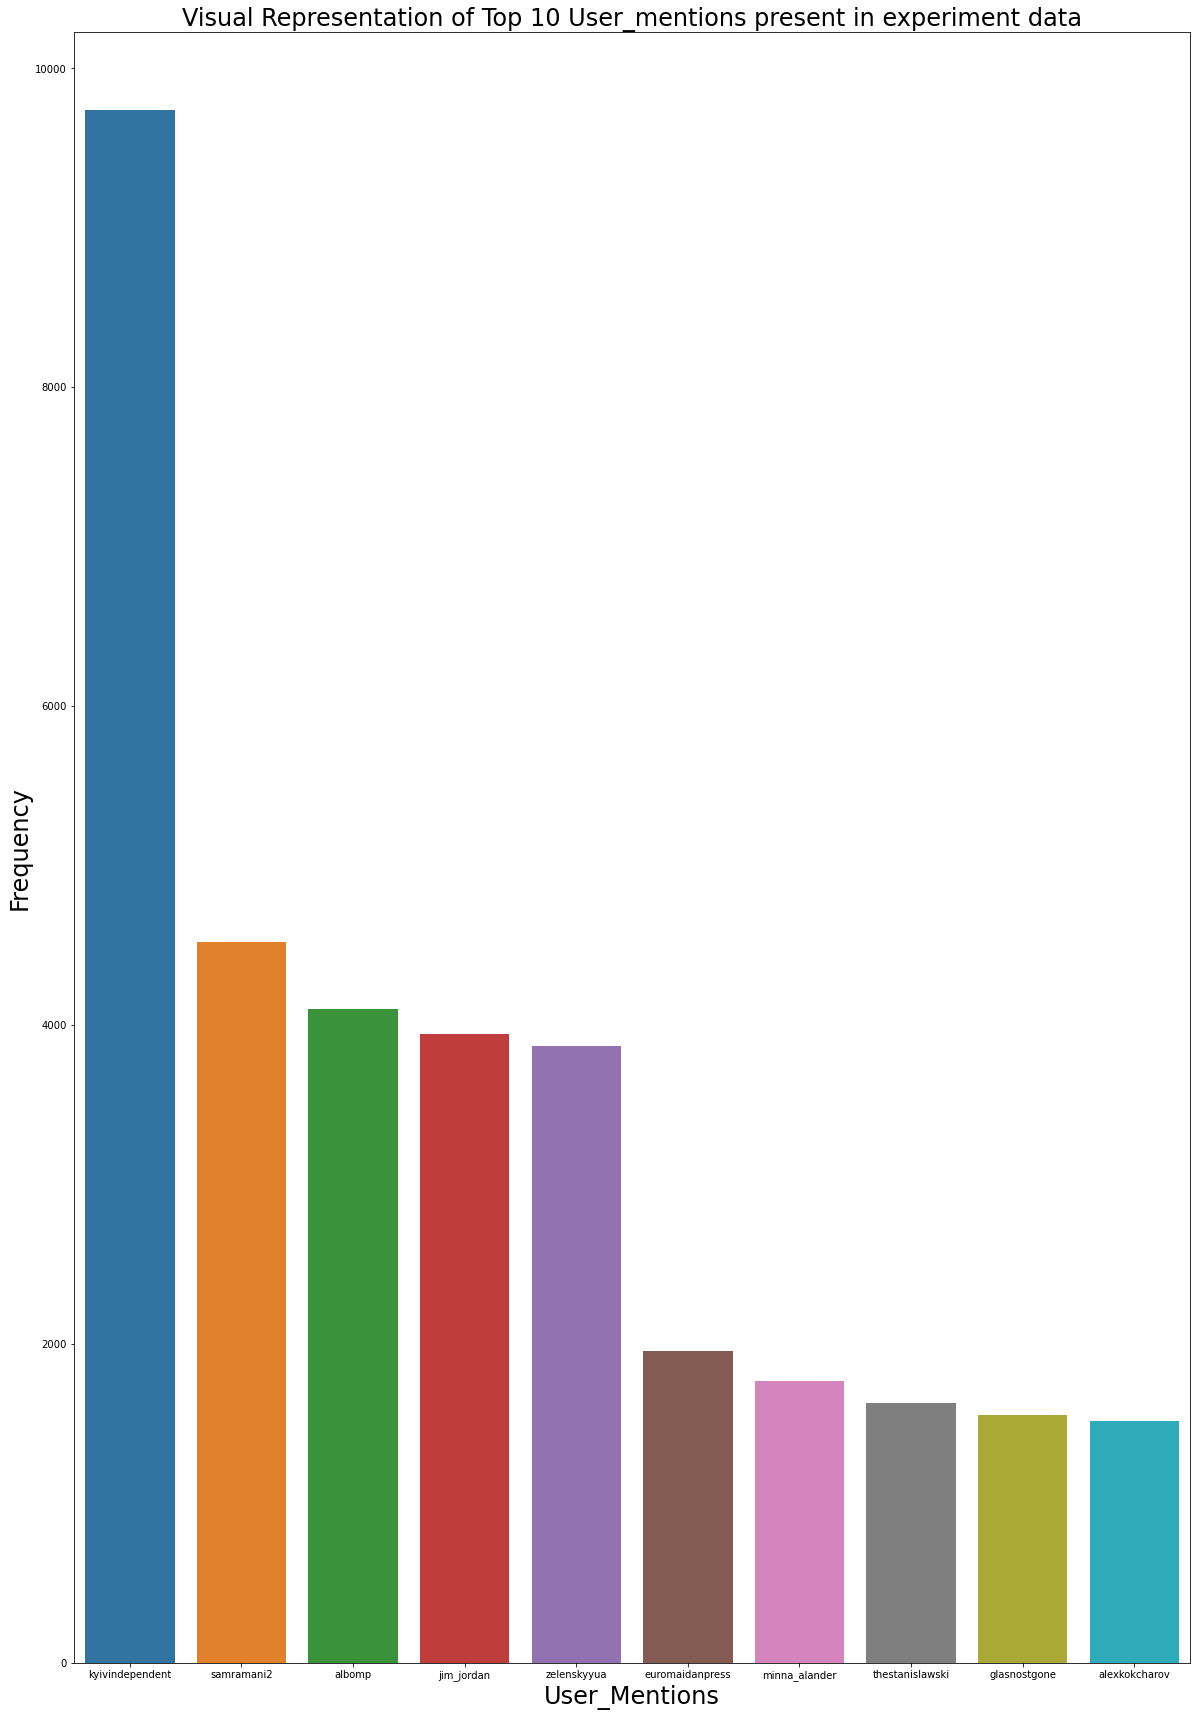

In [17]:
viewUserMention()

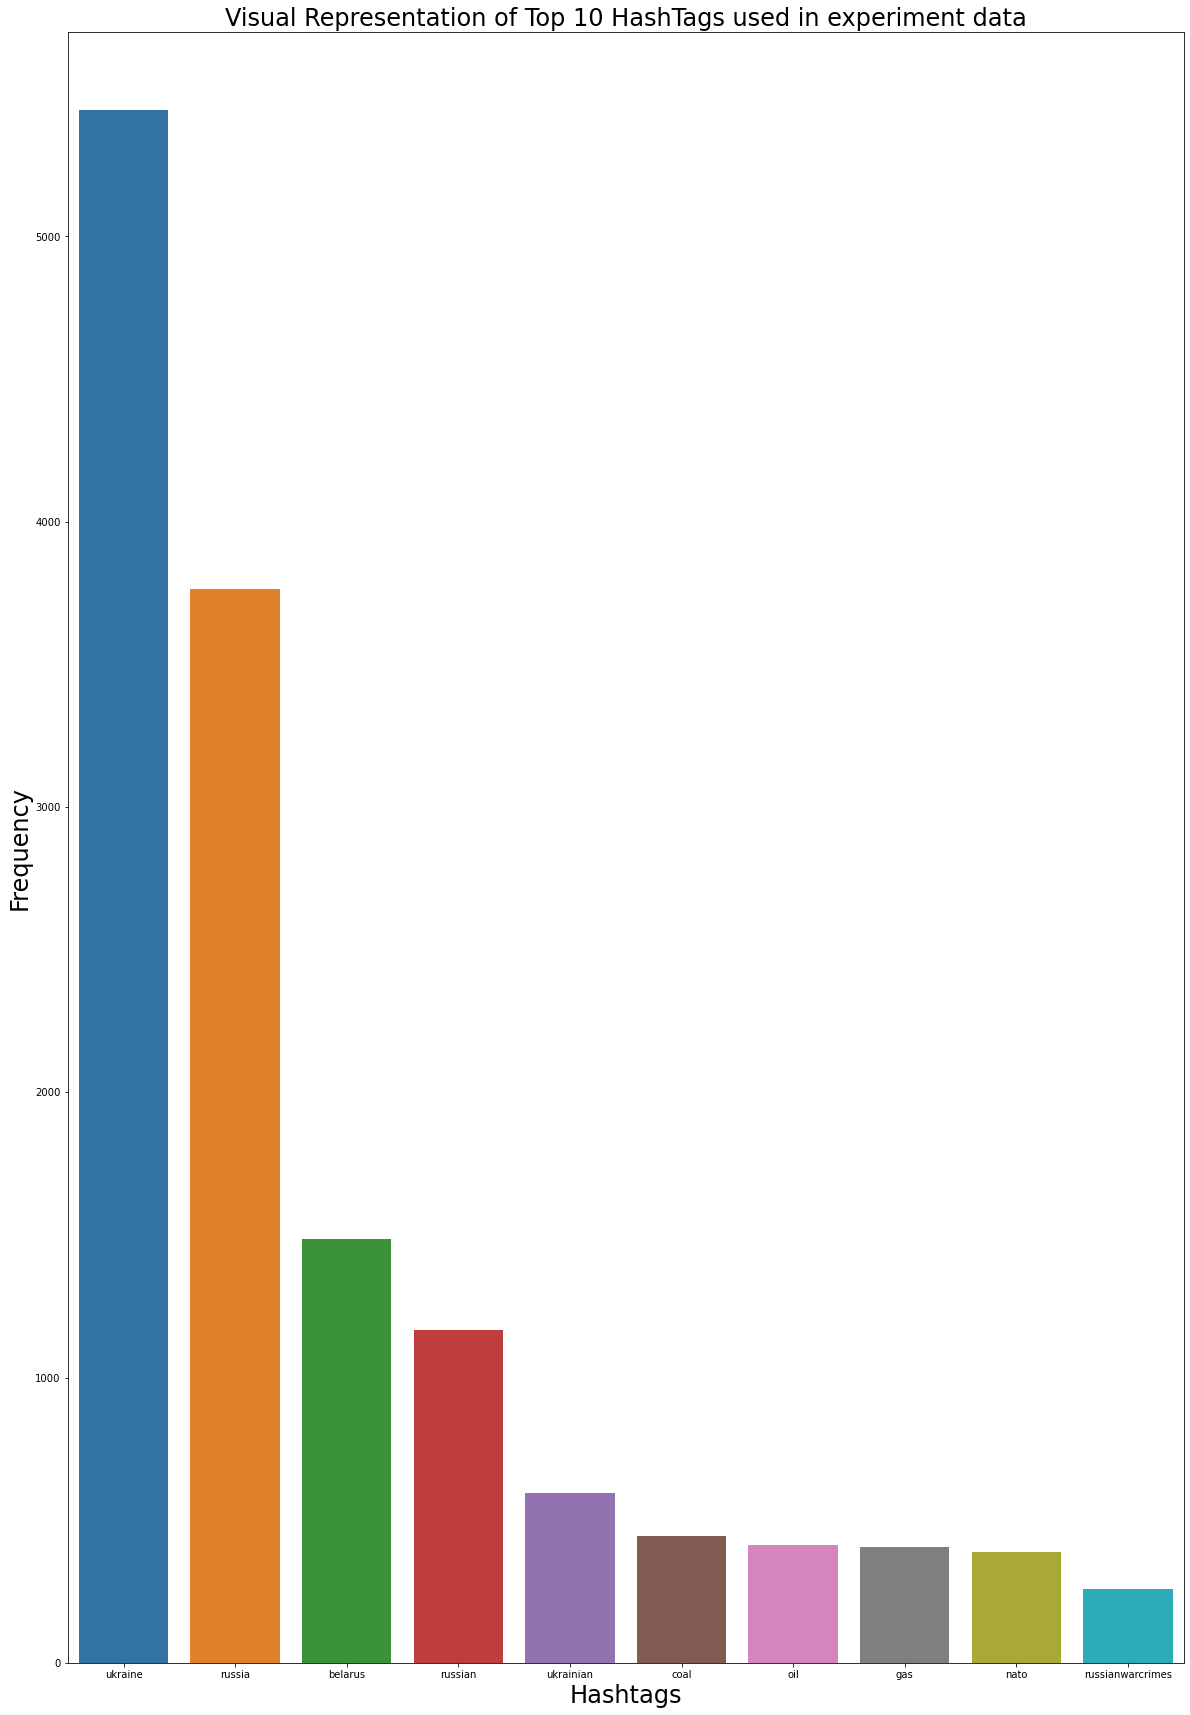

In [18]:
viewTopHashTags()

In [ ]:
#plot_Raw_TweetsCount_ByDays()

In [45]:
rawTwit.loc[rawTwit['truncated']==True,'text']=rawTwit['extended_tweet.full_text']

## Showing truncated Tweets are now updated with full Tweets text from extended tweet column

In [47]:
rawTwit['text'][82121]

'RT @GlasnostGone: If you tolerate this, then your children will be next. \n\nRecent figures show 991 #Ukrainian children have become casualti…'

In [49]:
rawTwit['text'][82124]

'RT @clarissaward: We met mothers who walked for days in search of food for their families. We saw the fresh graves of children who have die…'

## Drropping columns not needed for the analysis

In [22]:
rawTwit.drop(['truncated','extended_tweet.full_text','id','source','user.screen_name','user.description'], axis = 1, inplace = True)

In [23]:
rawTwit.head(2)

,_id,created_at,text,user.location
0,62c025362199f17ae64a6e30,Sat Jul 02 11:00:00 +0000 2022,The insurance industry has an opportunity to d...,"London, UK"
1,62c025362199f17ae64a6e2f,Sat Jul 02 11:00:00 +0000 2022,The insurance industry has an opportunity to d...,"London, UK"


## Renaming Tweet Column to human friendly name

In [24]:
rawTwit.rename(columns={'_id': 'TweetsID', 'text': 'TweetsText','user.location':'User_Location','created_at':'Date'}, inplace=True)

In [25]:
rawTwit.head(2)

,TweetsID,Date,TweetsText,User_Location
0,62c025362199f17ae64a6e30,Sat Jul 02 11:00:00 +0000 2022,The insurance industry has an opportunity to d...,"London, UK"
1,62c025362199f17ae64a6e2f,Sat Jul 02 11:00:00 +0000 2022,The insurance industry has an opportunity to d...,"London, UK"


In [26]:
rawTwit.to_csv('processedTwit.csv', index = False) #Saving distinct Tweets to CSV File

,_id,created_at,id,text,source,truncated,user.screen_name,user.location,user.description,extended_tweet.full_text
82121,62c765cf1ca034c21686f594,Thu Jul 07 23:01:30 +0000 2022,1545181239849648135,"RT @GlasnostGone: If you tolerate this, then y...","<a href=""http://twitter.com/download/iphone"" r...",False,sinalouf,NaN,@BackAndAlive @UkraineAidOps @MriyaAid,NaN
82122,62c765d31ca034c21686f595,Thu Jul 07 23:01:34 +0000 2022,1545181258694664192,RT @GlasnostGone: Goodnight #Ukraine. I shed s...,"<a href=""http://twitter.com/download/android"" ...",False,chr_i_s_t_ine,Toronto,Ukrainian Canadian speaking Canadian Ukrainian...,NaN
82123,62c765d71ca034c21686f596,Thu Jul 07 23:01:38 +0000 2022,1545181272762359808,"RT @kennardmatt: As Zelensky hails the ""specia...","<a href=""http://twitter.com/download/iphone"" r...",False,BeckyCheAbas,"Brighton, England",Psychologist and Socialist. Dismayed by the re...,NaN
82124,62c765d71ca034c21686f597,Thu Jul 07 23:01:38 +0000 2022,1545181274863722498,RT @clarissaward: We met mothers who walked fo...,"<a href=""http://twitter.com/download/android"" ...",False,GhostDisco91,NaN,"She/her. I like weird TV, drinking champagne, ...",NaN
82125,62c765d81ca034c21686f598,Thu Jul 07 23:01:38 +0000 2022,1545181275056750594,RT @pvtjokerus: Those 71 million people are in...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,ghost_hecate,The Lone Prairie,We'll make great pets.,NaN


## Loading processed tweets to Dataframe

In [27]:
Tweets=get_tweet_content()

In [28]:
Tweets[0]

{'TweetsID': '62c025362199f17ae64a6e30',
 'RawTweets': 'The insurance industry has an opportunity to develop ’affirmative physical damage offerings’\nhttps://t.co/keH0CIswZV\n@LloydsofLondon\n #Cambridgecentreofriskstudies\n#RussiaUkraine #Cyber #Risk #GeopoliticalRisk',
 'Cleaned_Tweets': 'the insurance industry has an opportunity to develop affirmative physical damage offerings URL user_mention cambridgecentreofriskstudies russiaukraine cyber risk geopoliticalrisk ',
 'User_Location': 'London, UK',
 'Date': 'Sat Jul 02 11:00:00 +0000 2022'}

In [29]:
Tweets_dataFrame=pd.DataFrame(Tweets)

In [30]:
processing_data=Tweets_dataFrame.copy()

In [31]:
processing_data.info() #Cleaned Tweet after removing Re-Tweets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17261 entries, 0 to 17260
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TweetsID        17261 non-null  object
 1   RawTweets       17261 non-null  object
 2   Cleaned_Tweets  17261 non-null  object
 3   User_Location   17261 non-null  object
 4   Date            17261 non-null  object
dtypes: object(5)
memory usage: 674.4+ KB


## Checking for duplicate tweets

In [32]:
processing_data[processing_data.duplicated(['TweetsID'], keep='first')]

,TweetsID,RawTweets,Cleaned_Tweets,User_Location,Date


In [33]:
processing_data[processing_data.duplicated(['Cleaned_Tweets'], keep='first')]

,TweetsID,RawTweets,Cleaned_Tweets,User_Location,Date
1,62c025362199f17ae64a6e2f,The insurance industry has an opportunity to d...,the insurance industry has an opportunity to d...,"London, UK",Sat Jul 02 11:00:00 +0000 2022
3,62c02a912199f17ae64a6e3a,A good perspective on the #Russia fake narrati...,a good perspective on the russia fake narrativ...,Worldwide,Sat Jul 02 11:22:52 +0000 2022
5,62c02a9e2199f17ae64a6e3c,@MU53701477 @abipittbull @Renehaehnlein @Ljudm...,user_mention user_mention user_mention user_me...,,Sat Jul 02 11:23:05 +0000 2022
7,62c02ad82199f17ae64a6e3e,Latest Russia-Ukraine War: Live Updates https:...,latest russiaukraine war live updates URL late...,,Sat Jul 02 11:24:03 +0000 2022
10,62c031265dcb23acdffbcf2f,@EU_Commission @vonderleyen @ua_parliament Tod...,user_mention user_mention user_mention today t...,,Sat Jul 02 11:50:57 +0000 2022
...,...,...,...,...,...
17175,62c75cb51ca034c21686f3b7,The US and Russia mark Pearl Harbor and Hitler...,the us and russia mark pearl harbor and hitler...,Netherlands,Thu Jul 07 22:22:40 +0000 2022
17191,62c75e611ca034c21686f411,Jacinda Ardern warns West against isolating Ch...,jacinda ardern warns west against isolating ch...,Australia,Thu Jul 07 22:29:48 +0000 2022
17204,62c75f9e1ca034c21686f452,Russia's Ukraine invasion is slowly approachin...,russias ukraine invasion is slowly approaching...,"ÜT: 40.74037,-74.046637",Thu Jul 07 22:35:05 +0000 2022
17222,62c761f11ca034c21686f4c9,#EnergyNewsMonitor | #China’s #coal imports su...,energynewsmonitor chinas coal imports surged ...,"Nariman Point, Mumbai, India",Thu Jul 07 22:45:00 +0000 2022


In [34]:
processing_data=processing_data.drop_duplicates(subset=['Cleaned_Tweets'],keep='first') #Removing by TweetsText Column

In [ ]:
processing_data[processing_data.duplicated(['Cleaned_Tweets'], keep='first')] #Re-checking to confirm duplicate tweet is removed.

In [51]:
processing_data.tail(2)

,TweetsID,RawTweets,Cleaned_Tweets,User_Location,Date
17259,62c765971ca034c21686f58a,Putin warns Russian invasion in Ukraine has on...,putin warns russian invasion in ukraine has on...,,Thu Jul 07 23:00:34 +0000 2022
17260,62c765b81ca034c21686f591,Entering at day #135 of Russia Invasion [UTC+1...,entering at day 135 of russia invasion utc1 co...,,Thu Jul 07 23:01:07 +0000 2022


In [52]:
processing_data['Cleaned_Tweets'][17259]

'putin warns russian invasion in ukraine has only just begun URL vladimir putin said that russias invasion of ukraine had barely gotten started and dared the west to try to defeat it on the battlefield'

In [53]:
processing_data['Cleaned_Tweets'][17260]

'entering at day 135 of russia invasion utc1 counting since 24th of february'

In [36]:
processing_data.info() #Distincts Tweets is 8950. 8311 duplicates have beennremoved

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 17260
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TweetsID        8950 non-null   object
 1   RawTweets       8950 non-null   object
 2   Cleaned_Tweets  8950 non-null   object
 3   User_Location   8950 non-null   object
 4   Date            8950 non-null   object
dtypes: object(5)
memory usage: 419.5+ KB


In [37]:
processing_data.to_csv('Cleaned.csv', index = False) #Saving distinct cleaned Tweets to CSV File

## Coresponding function for above analysis

In [7]:
def process_tweet(tweets):
    
    #for twit in tweets:      
    # Convert to lower case
    tweet= tweets.lower()
    # Replaces URLs with the word URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    # Replace @handle with the word USER_MENTION
    tweet = re.sub(r'@[\S]+', 'user_mention', tweet)
    # Replaces #hashtag with hashtag
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', 'RT', tweet)
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Strip space, " and ' from tweet
    tweet = re.sub(r'[^\w\s]','',tweet)
    # Replace emojis with either EMO_POS or EMO_NEG
    tweet = handle_emojis(tweet)
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    #tweet=[char for char in tweet if char not in string.punctuation]
    words = ''.join(tweet)
    tweet = words
    return tweet


In [8]:
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet

In [9]:
import csv
import re
def get_tweet_content():
    #import csv    
    from datetime import datetime
    lex1=[]
    
    reader = csv.reader(open('processedTwit.csv', 'r',encoding="utf8"))
    csvreader = csv.reader(reader)
    next(reader)
    for line in reader:
        lex={}
        TweetsID,Time_Created,TweetsText,User_Location= line
        lex['TweetsID']=str(TweetsID)
        lex['RawTweets']=TweetsText
        lex['Cleaned_Tweets']=TweetsText
        lex['User_Location']=User_Location
        lex['Date']=Time_Created
        #lex['Short_Date']=S_Date
    # ignore retweets 
        #if (lex['User_Location']==''):        
            #lex['User_Location']='LOCATION'
        if lex['Cleaned_Tweets'].startswith('RT') or len(lex['Cleaned_Tweets']) < 1:
                pass 
        else:
            lex['Cleaned_Tweets']=process_tweet(TweetsText)
            lex['RawTweets']=TweetsText
            lex1.append(lex)
    
    return lex1

In [10]:
def plot_Raw_TweetsCount_ByDays():
    ts_date = rawTwit['created_at']
    ts_date = ts_date.tolist()
    ts_date_dict = dict(Counter(ts_date))
    tsdata = pd.DataFrame({'date' : list(ts_date_dict.keys()), 'count_tweets' : list(ts_date_dict.values())})
    tsdata = tsdata.sort_values('date')
    tsdata = tsdata.set_index('date')
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax.set_xticklabels(tsdata.index, rotation=90)
    fig.suptitle('Raw Tweets:\nNumber of Tweets Per Day', fontsize=20)
    plt.xlabel('Period of Data Collection', fontsize=18)
    plt.ylabel('Frequency', fontsize=16)
    plt.plot(tsdata)
    fig.savefig('Cleaned Tweets:\nNumber of Tweets Per Day.jpg')

In [11]:
def plot_Cleaned_TweetsCount_ByDays():
    ts_date = rawTwit['Date']
    ts_date = ts_date.tolist()
    ts_date_dict = dict(Counter(ts_date))
    tsdata = pd.DataFrame({'date' : list(ts_date_dict.keys()), 'count_tweets' : list(ts_date_dict.values())})
    tsdata = tsdata.sort_values('date')
    tsdata = tsdata.set_index('date')
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax.set_xticklabels(tsdata.index, rotation=90)
    fig.suptitle('Cleaned Tweets:\nNumber of Tweets Per Day', fontsize=20)
    plt.xlabel('Period of Data Collection', fontsize=18)
    plt.ylabel('Frequency', fontsize=16)
    plt.plot(tsdata)
    fig.savefig('Number of Tweets Per Day.jpg')

In [12]:
#Collecting the hashtags
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
#tweet = re.sub(r'#(\S+)', r' \1 ', tweet)

In [13]:
#Collecting the hashtags
def usermention_extract(x):
    usermention = []
    
    for i in x:
        um = re.findall(r"@(\w+)", i)
        usermention.append(um)

    return usermention

In [15]:
def viewTopHashTags():
    hashTags = hashtag_extract(rawTwit['text'])
    hashTags = sum(hashTags,[])
    hashTags= [x.lower() for x in hashTags if len(x)>1]
    count_hashTags = dict(Counter(hashTags))
    Dframe_hashTags = pd.DataFrame({'Hashtag': list(count_hashTags.keys()),
                  'Count': list(count_hashTags.values())})
    Dframe_hashTags = Dframe_hashTags.nlargest(columns="Count", n=10) 
    plt.figure(figsize=(20,30))
    ax = sns.barplot(data=Dframe_hashTags, x= "Hashtag", y = "Count")
    plt.ylabel('Frequency', fontsize=24)
    plt.xlabel('Hashtags', fontsize=24)
    plt.title('Visual Representation of Top 10 HashTags used in experiment data', fontsize=24)

In [16]:
def viewUserMention():
    userMention = usermention_extract(rawTwit['text'])
    userMention = sum(userMention,[])
    userMention= [x.lower() for x in userMention if len(x)>1]
    count_userMention = dict(Counter(userMention))
    Dframe_userMention = pd.DataFrame({'UserNames': list(count_userMention.keys()),
                  'Count': list(count_userMention.values())})
    Dframe_userMention = Dframe_userMention.nlargest(columns="Count", n=10) 
    plt.figure(figsize=(20,30))
    ax = sns.barplot(data=Dframe_userMention, x= "UserNames", y = "Count")
    plt.ylabel('Frequency', fontsize=24)
    plt.xlabel('User_Mentions', fontsize=24)
    plt.title('Visual Representation of Top 10 User_mentions present in experiment data', fontsize=24)

Test

# test